In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
data=pd.read_csv("Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.loc[data['Sales'] >=8.5,'sales']= 'high'
data.loc[data['Sales'] <8.5,'sales']= 'low'

In [5]:
data.drop('Sales',axis=1,inplace=True)

In [6]:
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,141,64,3,340,128,Bad,38,13,Yes,No,low


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
 10  sales        400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [8]:
data.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales          0
dtype: int64

In [9]:
data.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [10]:
label_encoder=preprocessing.LabelEncoder()
data['US']=label_encoder.fit_transform(data['US'])
data['US'].unique()

array([1, 0])

In [11]:
label_encoder = preprocessing.LabelEncoder() 
data['Urban']= label_encoder.fit_transform(data['Urban'])

In [12]:
label_encoder = preprocessing.LabelEncoder() 
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc']) 

In [13]:
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,high
1,111,48,16,260,83,1,65,10,1,1,high
2,113,35,10,269,80,2,59,12,1,1,high
3,117,100,4,466,97,2,55,14,1,1,low
4,141,64,3,340,128,0,38,13,1,0,low


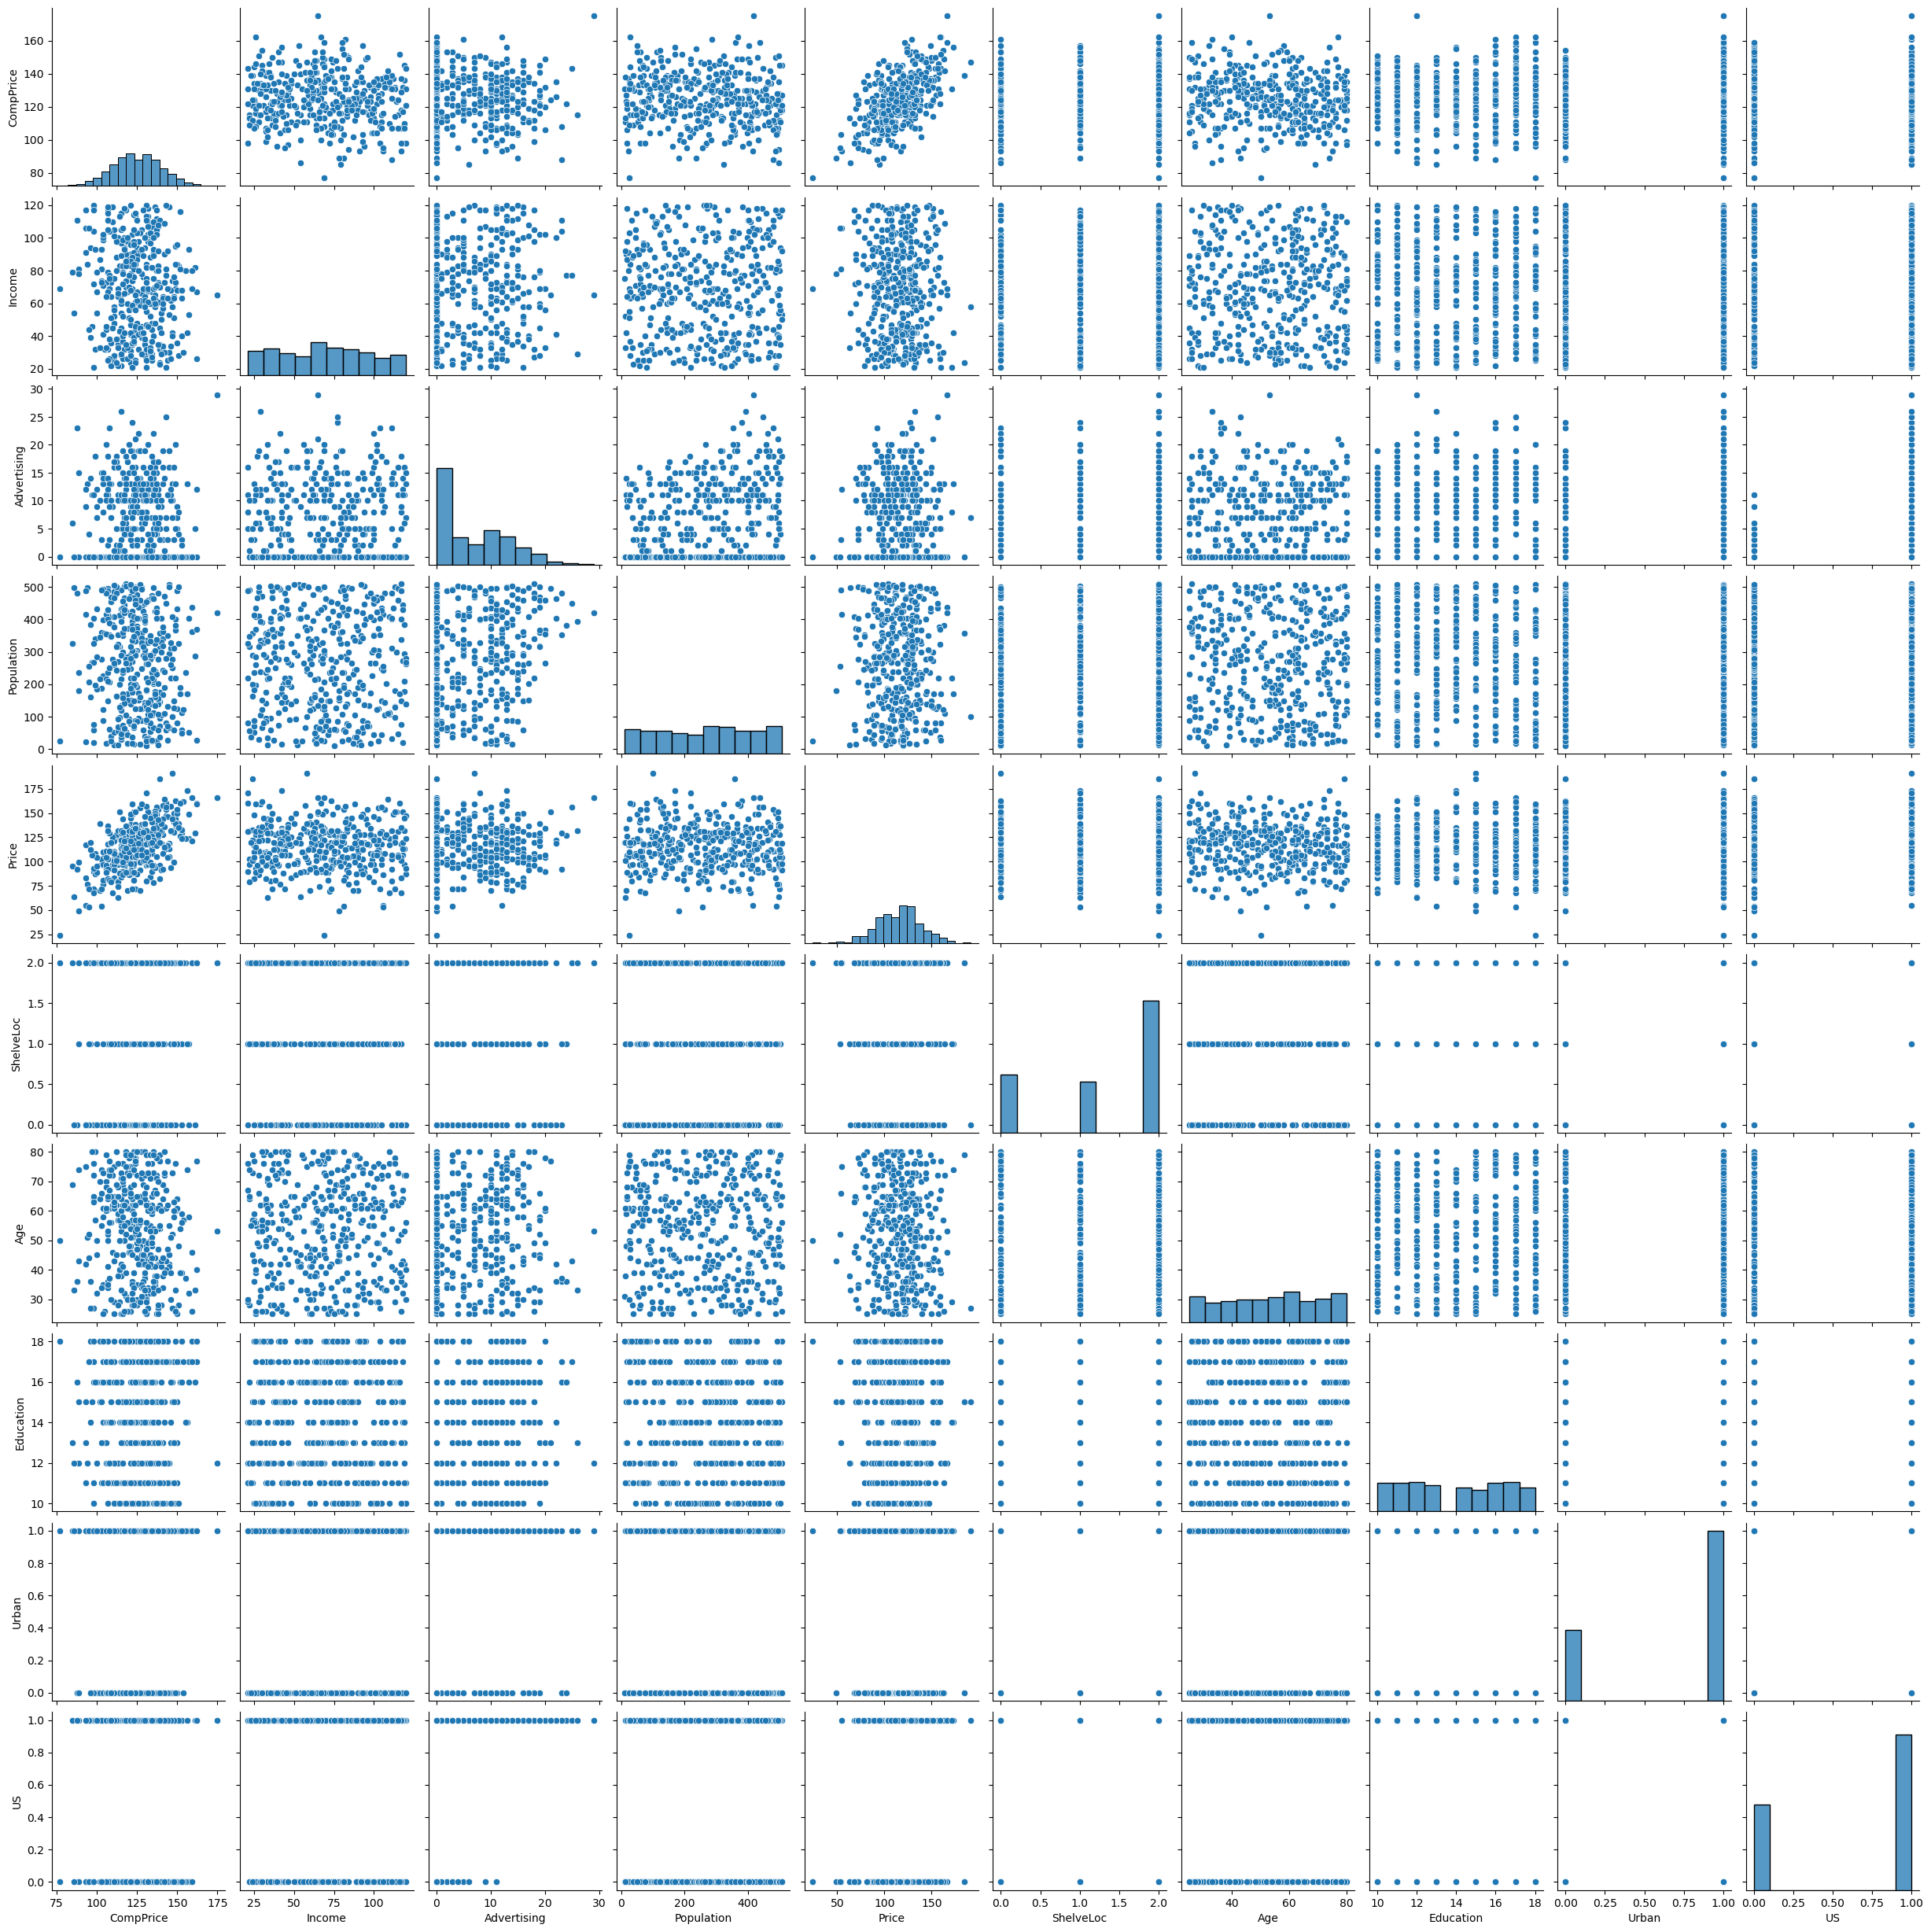

In [14]:
sns.pairplot(data)

In [16]:
colnames = list(data.columns)
predictor = colnames[0:10]
target = colnames[10]

In [17]:
predictor

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [18]:
target

'sales'

In [19]:
data.dtypes

CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc       int32
Age             int64
Education       int64
Urban           int32
US              int32
sales          object
dtype: object

In [20]:
label_encoder = preprocessing.LabelEncoder()
data['sales'] = label_encoder.fit_transform(data['sales'])

In [23]:
train, test = train_test_split(data, test_size = 0.33, random_state = 19)

In [24]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(train[predictor], train[target])

DecisionTreeClassifier(criterion='entropy', max_depth=3)

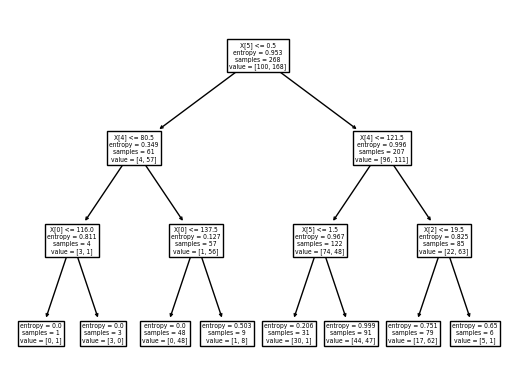

In [32]:
from sklearn import tree
tree.plot_tree(model);

In [34]:
preds = model.predict(test[predictor])

In [35]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
pd.Series(preds).value_counts()

1    119
0     13
dtype: int64

In [37]:
pd.crosstab(test[target],preds)

col_0,0,1
sales,,
0,11,32
1,2,87


In [39]:
np.mean(preds == test[target])*100

74.24242424242425